# Aktivitätsbezogene Analysen

Das studentische Verhalten wird nachfolgend bezüglich ausgeführten Aktivitäten betrachtet.

**Zeitraum der aufgezeichneten Log-Einträge**
Montag, 12.10.2020 bis Donnerstag, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

### Import von Bibliotheken und anderen Erweiterungen

In [1]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [2]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Herstellung der Verbindung zur MySQL-Datenbank

In [3]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Selektiver Import der Arbeitsdaten aus der MySQL-Datenbank

**Begrenzung der Selektion auf Studenten**

In [4]:
# Gegenstand der Untersuchungen sind nur Datensätze von Benutzern, die zuvor als Studenten identifiziert wurden.
query = """SELECT * FROM moodle_data WHERE userstatus = 'student' OR relateduserstatus = 'student'"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Ausgabe der Arbeitsdaten
moodle_data

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,629,1,13,student,-2,other,viewed,\core\event\user_profile_viewed,user,3837,2020-10-17 09:00:11,,0
2,0,0,-2,other,24,student,sent,\core\event\notification_sent,notifications,3281851,2020-10-18 14:27:05,,0
3,0,0,-2,other,1,student,sent,\core\event\notification_sent,notifications,3281852,2020-10-18 14:27:05,,0
4,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3290921,2020-10-19 15:54:03,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332762,28512,3,109,student,109,student,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0
332763,28512,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0
332764,0,0,109,student,109,student,viewed,\core\event\dashboard_viewed,,0,2021-06-03 21:13:25,,0
332765,28514,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:13:36,,0


### Unterscheidung von Lern- und Kommunikationsverhalten

&nbsp;
**Log-Einträge pro Student**

In [5]:
# In der Auswahl enthalten sind nur Studenten, die selbst eine Aktivität initiiert haben.
users = moodle_data.userid[moodle_data.userstatus == 'student'].groupby(moodle_data.userid).count()
display(users)

userid
1      3865
13     4330
18     1978
19     5823
20     5909
       ... 
131    3748
132    2973
134    4629
136      33
143    1387
Name: userid, Length: 69, dtype: int64

&nbsp;
**Log-Einträge pro Eventname**

In [6]:
eventnames = moodle_data.eventname.groupby(moodle_data.eventname).count()
display(eventnames)

eventname
\assignsubmission_comments\event\comment_created      73
\assignsubmission_comments\event\comment_deleted       3
\assignsubmission_file\event\assessable_uploaded    1166
\assignsubmission_file\event\submission_created      996
\assignsubmission_file\event\submission_updated      170
                                                    ... 
\mod_workshop\event\submission_created                22
\mod_workshop\event\submission_reassessed             66
\mod_workshop\event\submission_updated                26
\mod_workshop\event\submission_viewed                418
\report_outline\event\report_viewed                    2
Name: eventname, Length: 149, dtype: int64

&nbsp;
**Eventnames pro Student und Studiengang**

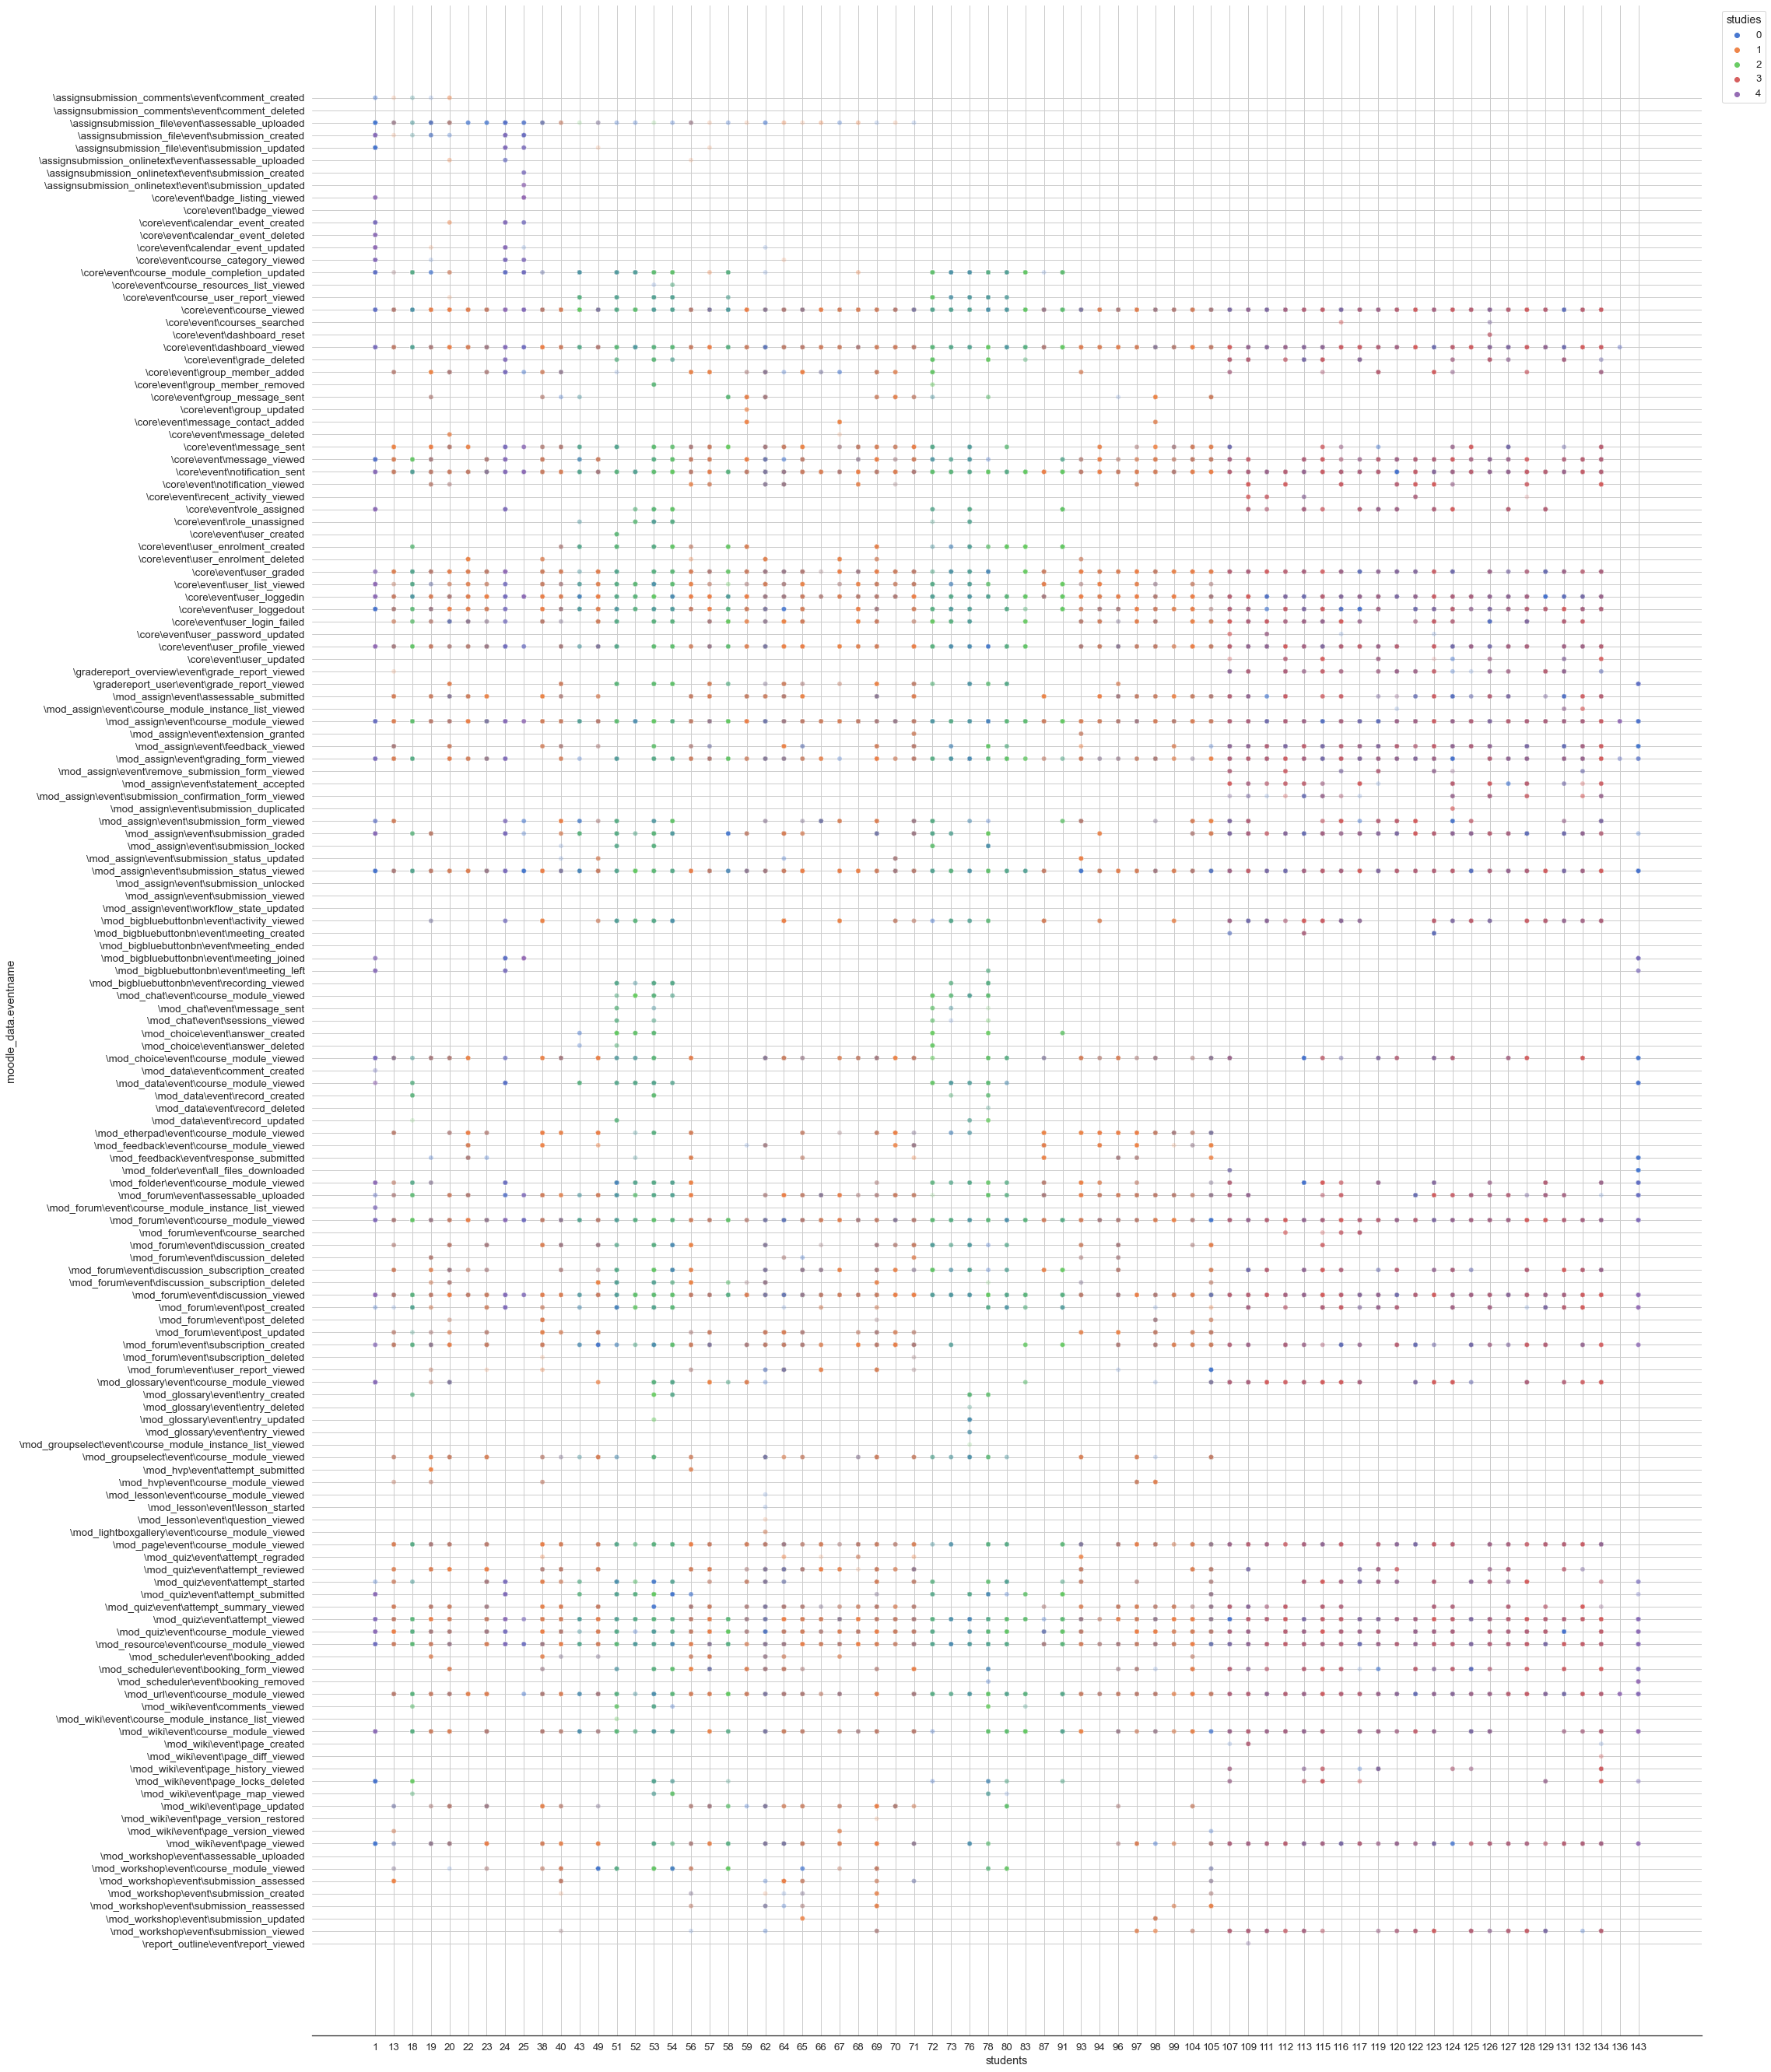

In [20]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 48)) # Größe der Visualisierung (in inch)

# Visualisierung des Eventnames pro Student und Studiengang
chart = sns.scatterplot(x=moodle_data.userid[moodle_data.userstatus == 'student'].astype(str), y=moodle_data.sort_values(by='eventname', ignore_index=True).eventname, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', alpha=0.2)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('students')
chart.set_ylabel('moodle_data.eventname')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.05, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

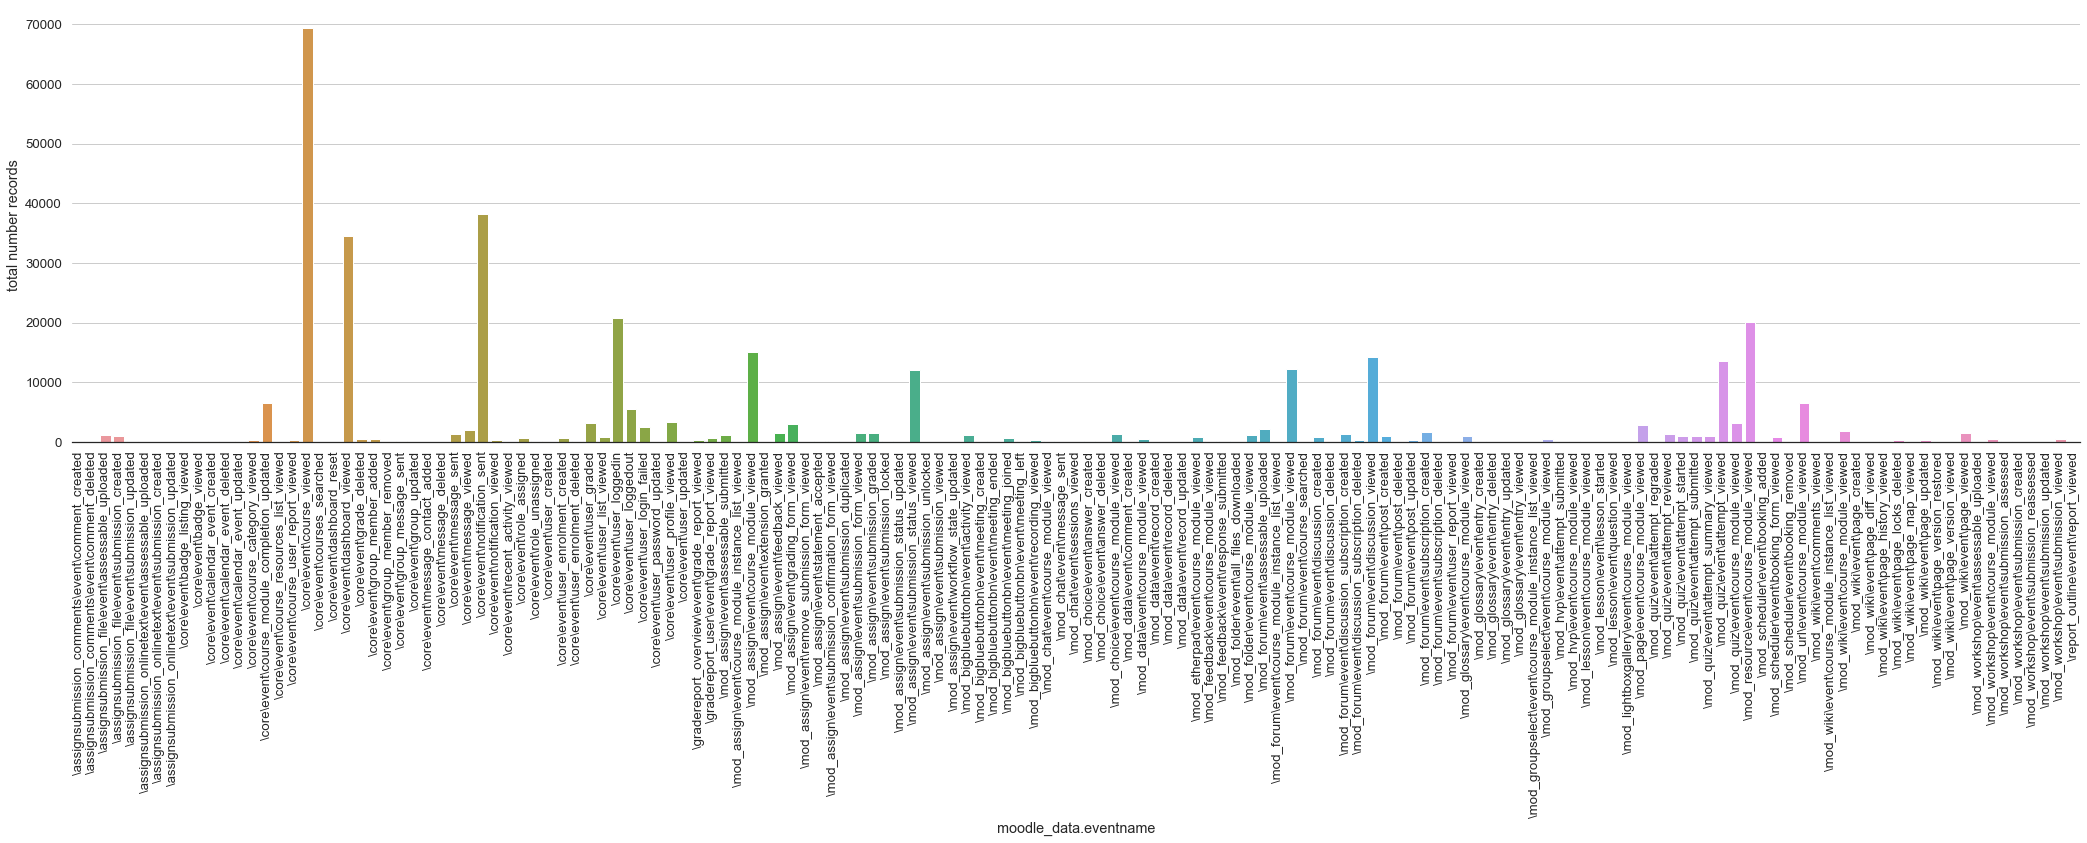

In [21]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Eventname
chart = sns.countplot(x=moodle_data.sort_values(by='eventname', ignore_index=True).eventname)
# chart = sns.countplot(x=moodle_data_students.eventname, hue=moodle_data_students.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.eventname')
chart.set_ylabel('total number records')
# chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Eventnames pro Student und Studiengang mit Personenbezug**

In [9]:
# Auswahl der Datensätze mit Personenbezug
moodle_data_related = moodle_data[moodle_data.relateduserid != 0]
moodle_data_related

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,629,1,13,student,-2,other,viewed,\core\event\user_profile_viewed,user,3837,2020-10-17 09:00:11,,0
2,0,0,-2,other,24,student,sent,\core\event\notification_sent,notifications,3281851,2020-10-18 14:27:05,,0
3,0,0,-2,other,1,student,sent,\core\event\notification_sent,notifications,3281852,2020-10-18 14:27:05,,0
4,0,0,1,student,-2,other,sent,\core\event\notification_sent,notifications,3290921,2020-10-19 15:54:03,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332753,28512,3,109,student,109,student,updated,\core\event\course_module_completion_updated,course_modules_completion,74802,2021-06-03 20:16:13,,0
332755,0,0,109,student,109,student,viewed,\core\event\dashboard_viewed,,0,2021-06-03 20:37:02,,0
332760,28512,3,109,student,109,student,created,\mod_forum\event\discussion_subscription_created,forum_discussion_subs,45244,2021-06-03 21:11:23,,0
332762,28512,3,109,student,109,student,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0


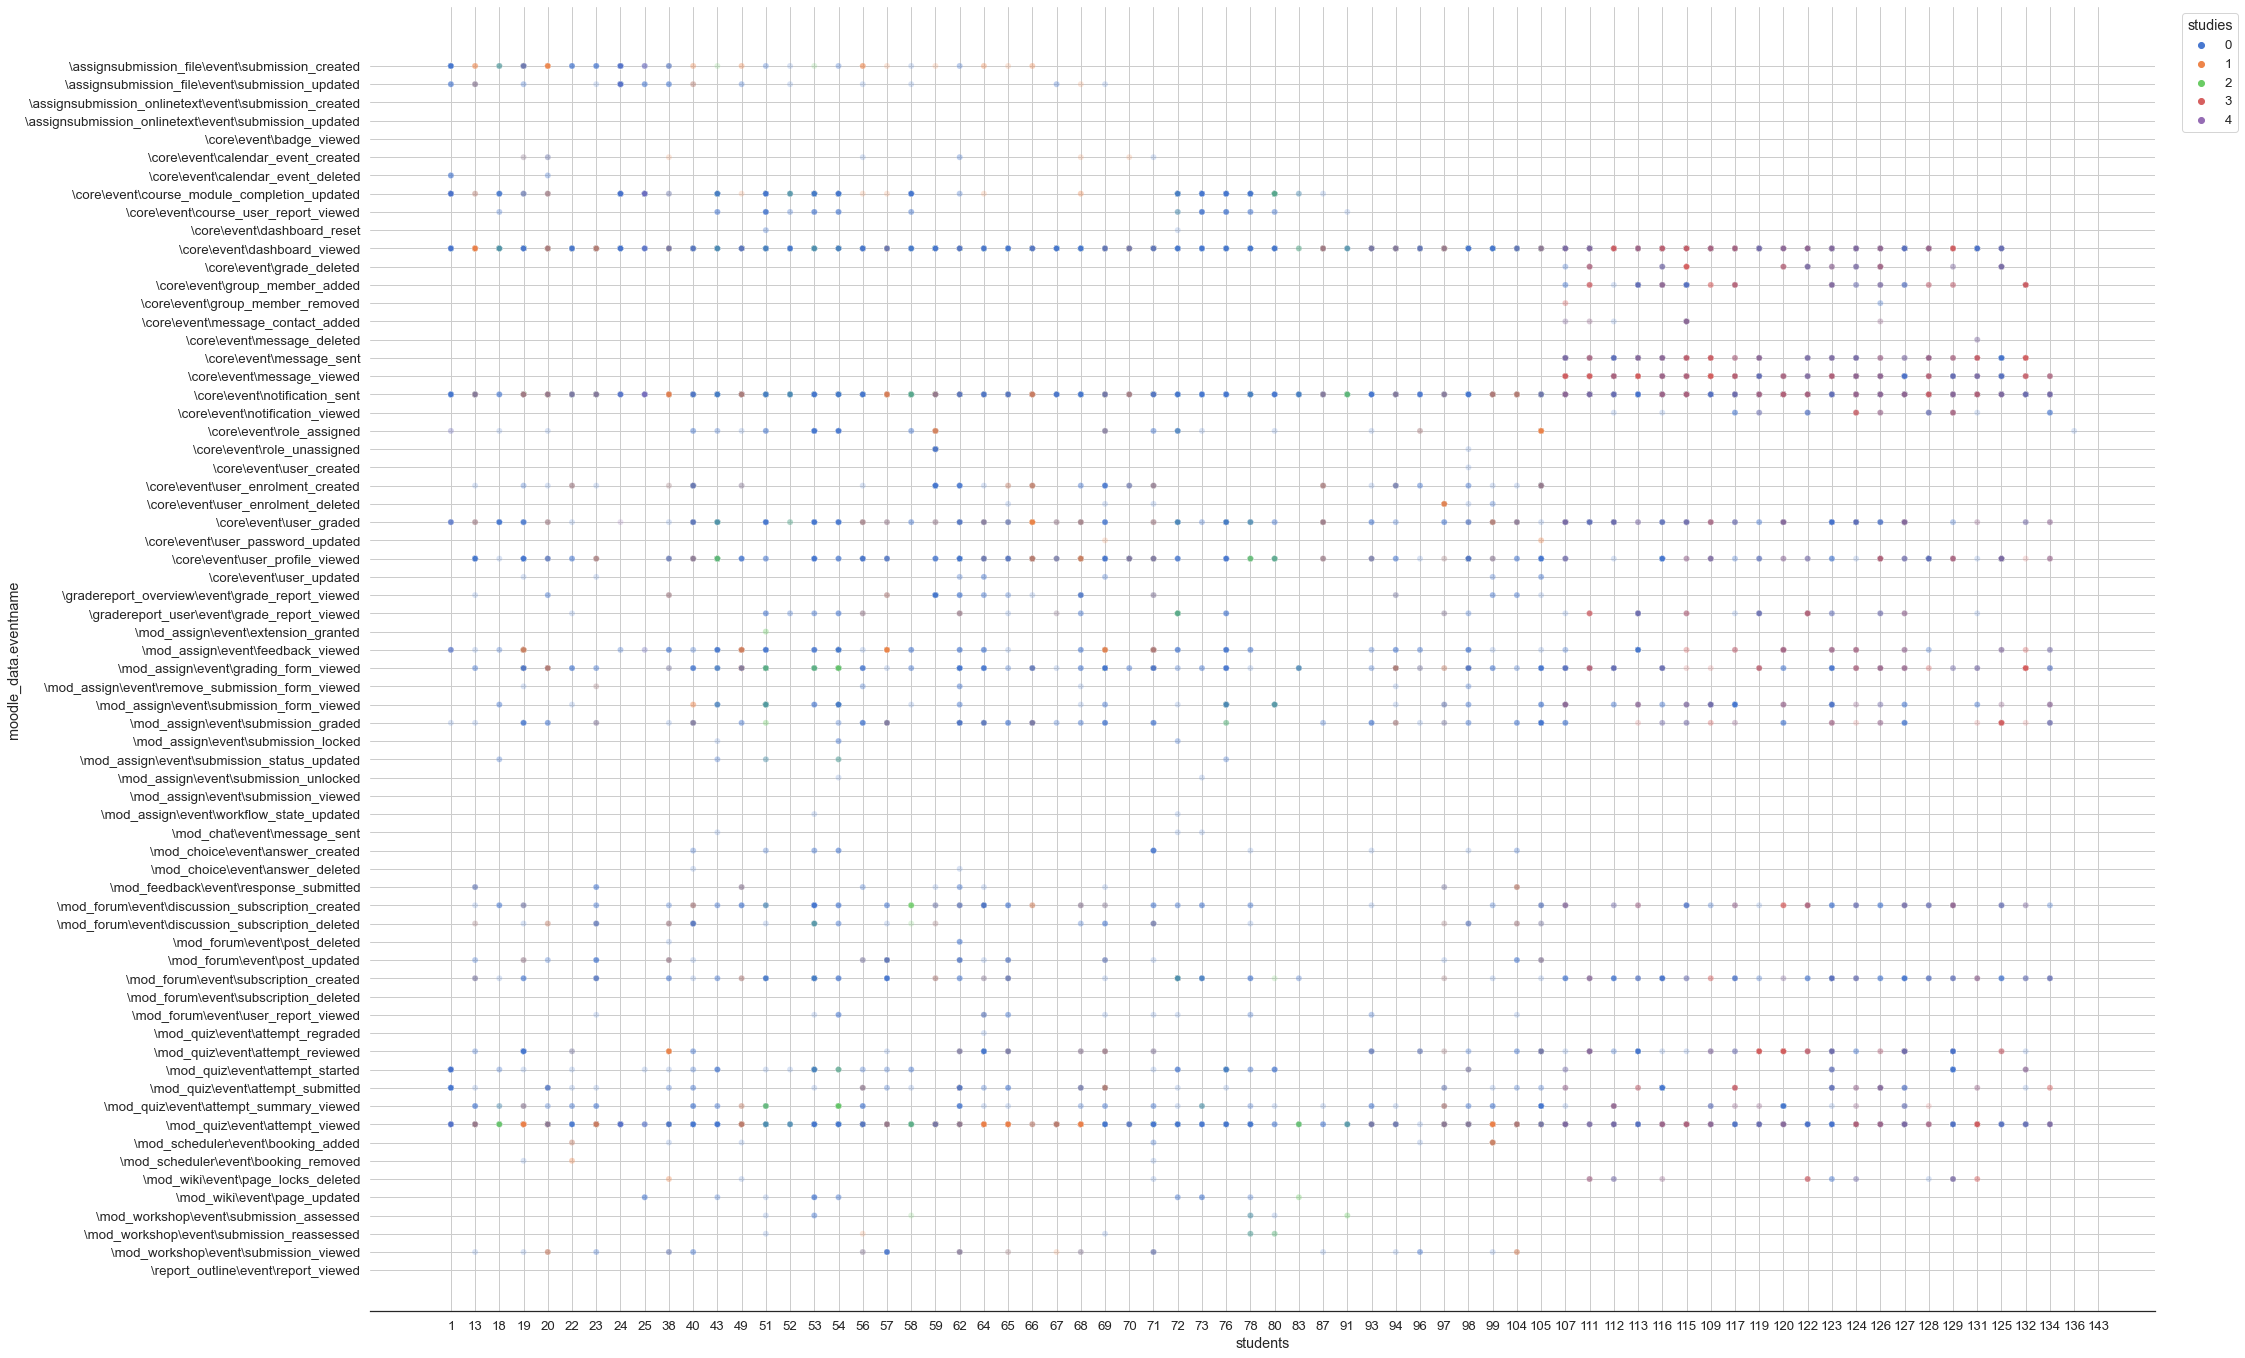

In [22]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 24)) # Größe der Visualisierung (in inch)

# Visualisierung des Eventnames pro Student und Studiengang
chart = sns.scatterplot(x=moodle_data_related.userid[moodle_data_related.userstatus == 'student'].astype(str), y=moodle_data_related.sort_values(by='eventname', ignore_index=True).eventname, hue=moodle_data_related.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', alpha=0.2)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('students')
chart.set_ylabel('moodle_data.eventname')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.05, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

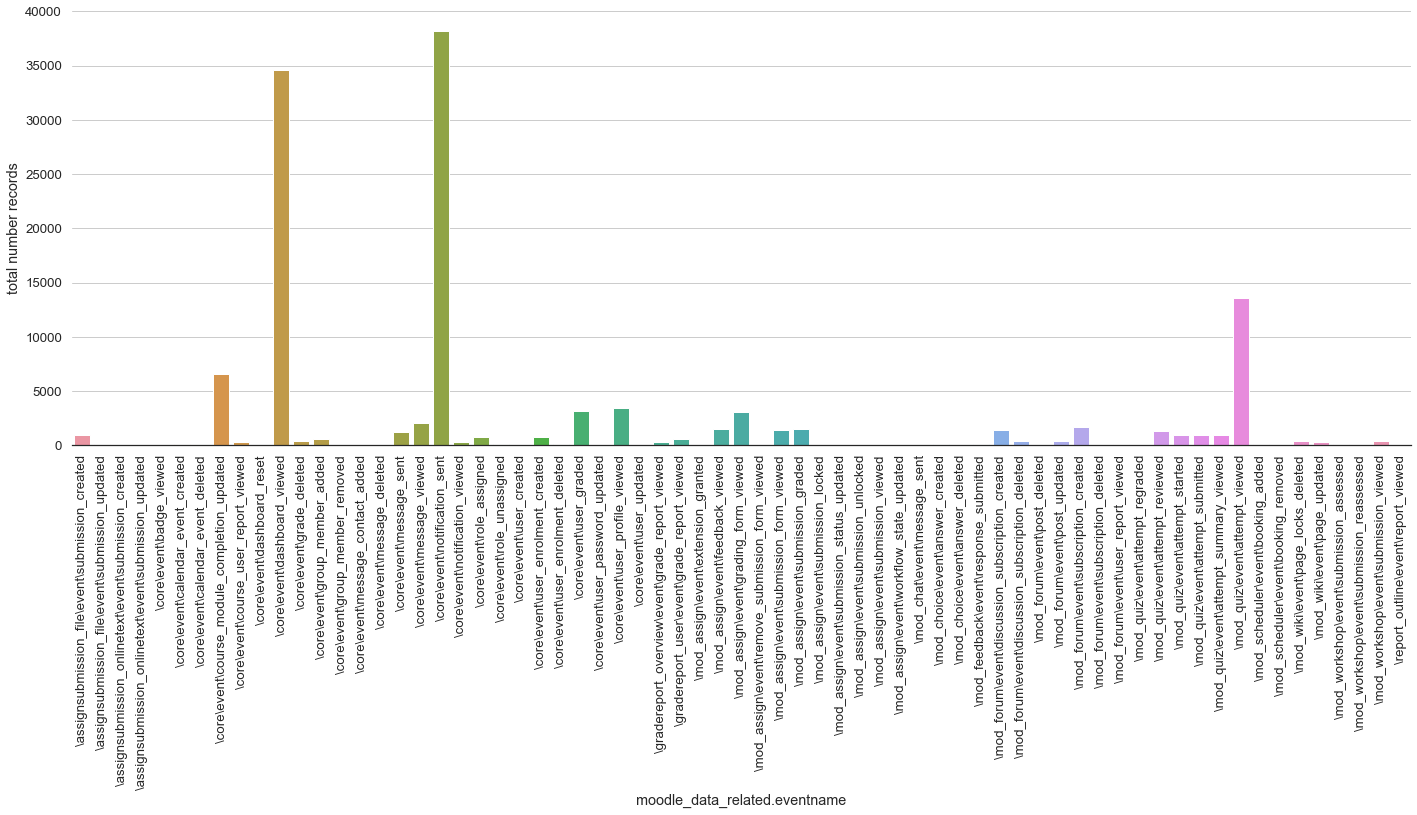

In [11]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Eventname mit Personenbezug
chart = sns.countplot(x=moodle_data_related.sort_values(by='eventname', ignore_index=True).eventname)
# chart = sns.countplot(x=moodle_data_students.eventname, hue=moodle_data_students.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data_related.eventname')
chart.set_ylabel('total number records')
# chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Eventnames pro Student und Studiengang ohne Personenbezug**

In [12]:
# Auswahl der Datensätze ohne Personenbezug
moodle_data_not_related = moodle_data[moodle_data.relateduserid == 0]
moodle_data_not_related

,courseid,Studiengang,userid,userstatus,relateduserid,relateduserstatus,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
1294,0,0,1,student,0,other,loggedin,\core\event\user_loggedin,user,38342,2020-10-12 03:54:58,,0
1296,27583,4,1,student,0,other,viewed,\core\event\course_viewed,,0,2020-10-12 03:55:03,,0
1297,27583,4,1,student,0,other,viewed,\mod_forum\event\course_module_viewed,forum,120548,2020-10-12 03:55:06,,0
1298,27583,4,1,student,0,other,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318592,2020-10-12 03:55:19,,0
1299,27583,4,1,student,0,other,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318577,2020-10-12 04:03:42,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332759,28512,3,109,student,0,other,created,\mod_forum\event\discussion_created,forum_discussions,335209,2021-06-03 21:11:23,,0
332761,28512,3,109,student,0,other,viewed,\mod_forum\event\course_module_viewed,forum,125767,2021-06-03 21:11:23,,0
332763,28512,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0
332765,28514,3,109,student,0,other,viewed,\core\event\course_viewed,,0,2021-06-03 21:13:36,,0


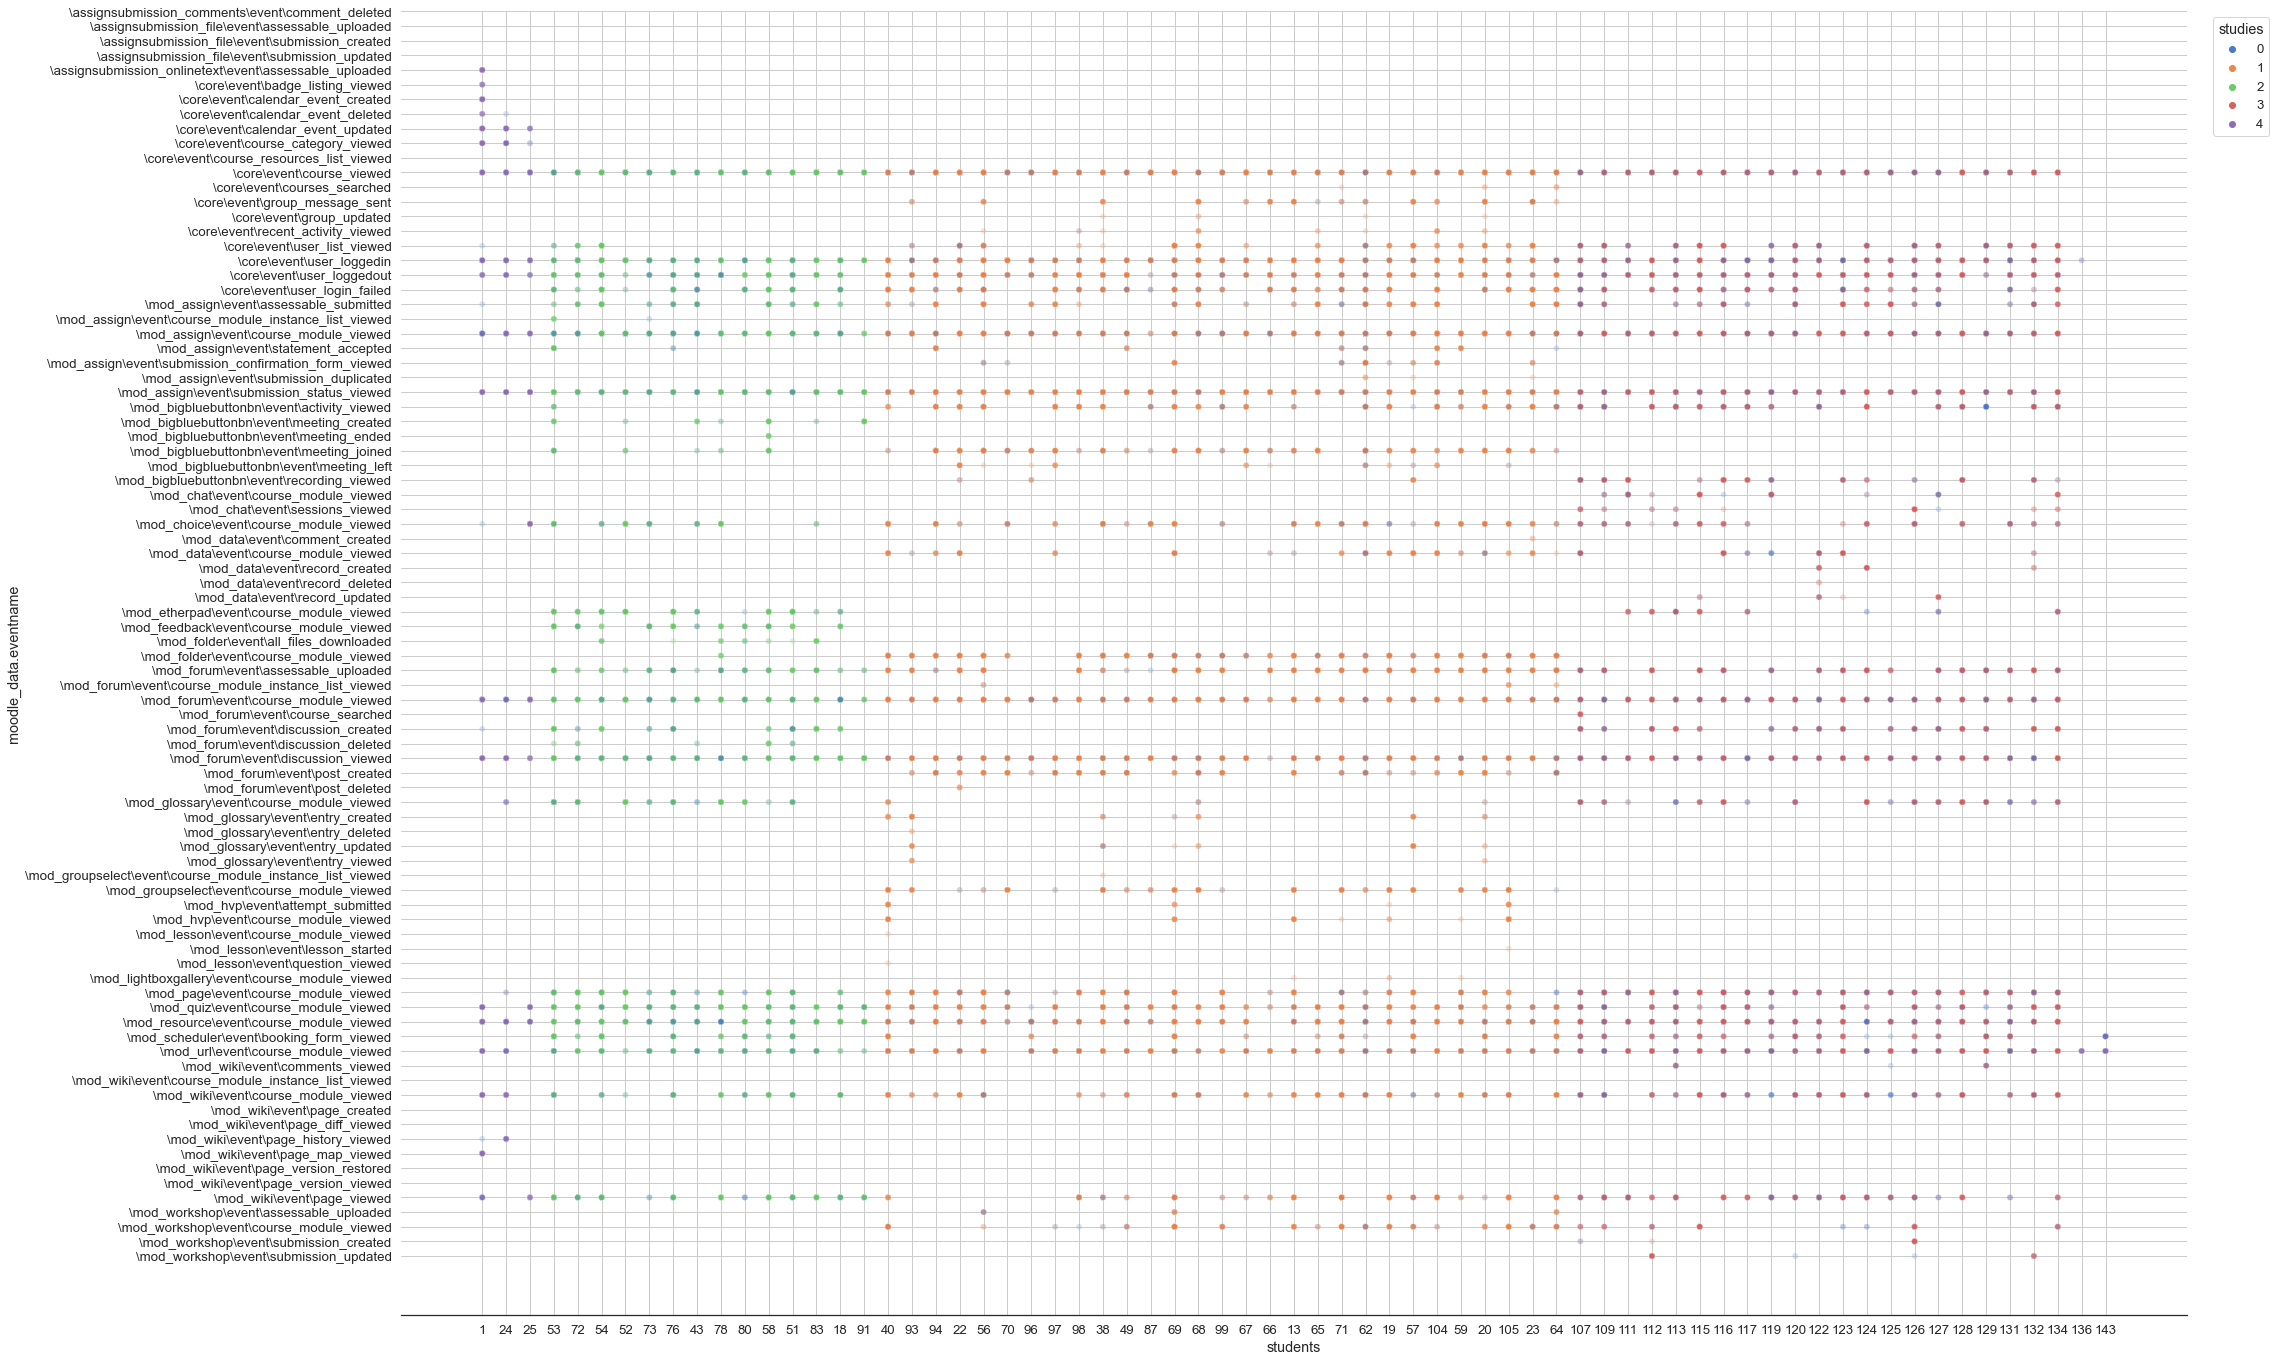

In [23]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 24)) # Größe der Visualisierung (in inch)

# Visualisierung des Eventnames pro Student und Studiengang
chart = sns.scatterplot(x=moodle_data_not_related.userid[moodle_data_not_related.userstatus == 'student'].astype(str), y=moodle_data_not_related.sort_values(by='eventname', ignore_index=True).eventname, hue=moodle_data_not_related.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', alpha=0.2)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('students')
chart.set_ylabel('moodle_data.eventname')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='studies', loc='upper right', bbox_to_anchor=(1.05, 1))
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

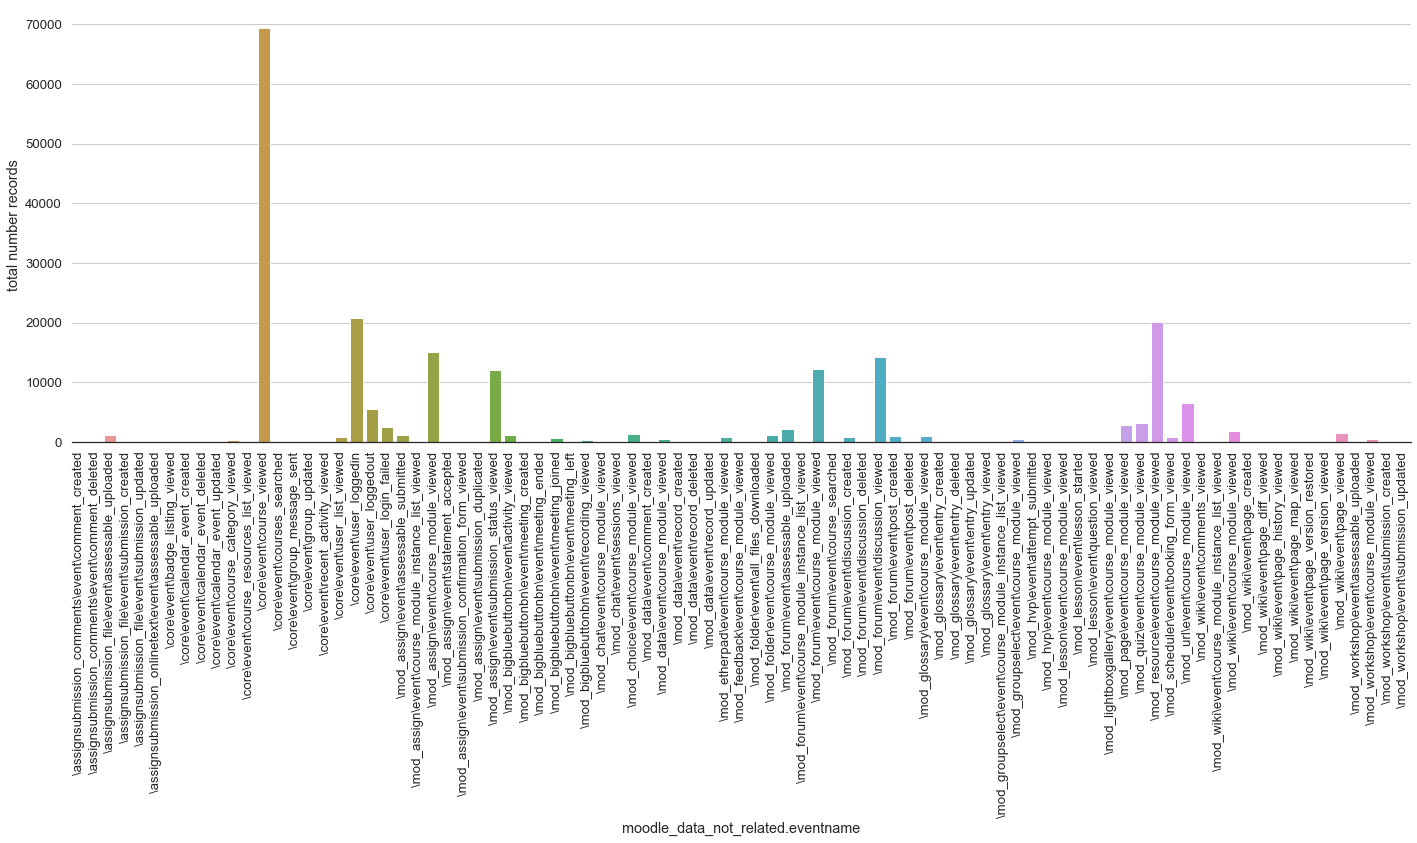

In [14]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Eventname ohne Personenbezug
chart = sns.countplot(x=moodle_data_not_related.sort_values(by='eventname', ignore_index=True).eventname)
# chart = sns.countplot(x=moodle_data_students.eventname, hue=moodle_data_students.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data_not_related.eventname')
chart.set_ylabel('total number records')
# chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Erstellung eines kombinierten Datensets für Eventnames mit und ohne Personenbezug**

In [15]:
# Ermittlung der Menge der Log-Einträge pro Eventname mit Personenbezug
related_eventnames = moodle_data_related.eventname.groupby(moodle_data_related.eventname).count()
display(related_eventnames)

eventname
\assignsubmission_file\event\submission_created          968
\assignsubmission_file\event\submission_updated          163
\assignsubmission_onlinetext\event\submission_created     27
\assignsubmission_onlinetext\event\submission_updated      8
\core\event\badge_viewed                                   1
                                                        ... 
\mod_wiki\event\page_updated                             345
\mod_workshop\event\submission_assessed                  149
\mod_workshop\event\submission_reassessed                 66
\mod_workshop\event\submission_viewed                    418
\report_outline\event\report_viewed                        2
Name: eventname, Length: 67, dtype: int64

In [16]:
# Ermittlung der Menge der Log-Einträge pro Eventname ohne Personenbezug
not_related_eventnames = moodle_data_not_related.eventname.groupby(moodle_data_not_related.eventname).count()
display(not_related_eventnames)

eventname
\assignsubmission_comments\event\comment_created      73
\assignsubmission_comments\event\comment_deleted       3
\assignsubmission_file\event\assessable_uploaded    1166
\assignsubmission_file\event\submission_created       28
\assignsubmission_file\event\submission_updated        7
                                                    ... 
\mod_wiki\event\page_viewed                         1568
\mod_workshop\event\assessable_uploaded               26
\mod_workshop\event\course_module_viewed             518
\mod_workshop\event\submission_created                22
\mod_workshop\event\submission_updated                26
Name: eventname, Length: 87, dtype: int64

In [17]:
# Erstellung eines kombinierten Datensets für Eventnames mit und ohne Personenbezug
users_eventnames = pd.concat([related_eventnames, not_related_eventnames], axis=1, keys=['related', 'not related']).sort_index()

# Ersetzung von NaN-Werten durch den Wert 0
users_eventnames = users_eventnames.fillna(0)

# Ausgabe des kombinierten Datensets
display(users_eventnames)

,related,not related
eventname,,
\assignsubmission_comments\event\comment_created,0.0,73.0
\assignsubmission_comments\event\comment_deleted,0.0,3.0
\assignsubmission_file\event\assessable_uploaded,0.0,1166.0
\assignsubmission_file\event\submission_created,968.0,28.0
\assignsubmission_file\event\submission_updated,163.0,7.0
...,...,...
\mod_workshop\event\submission_created,0.0,22.0
\mod_workshop\event\submission_reassessed,66.0,0.0
\mod_workshop\event\submission_updated,0.0,26.0


&nbsp;
**Visualisierung des kombinierten Datensets für Eventnames mit und ohne Personenbezug**

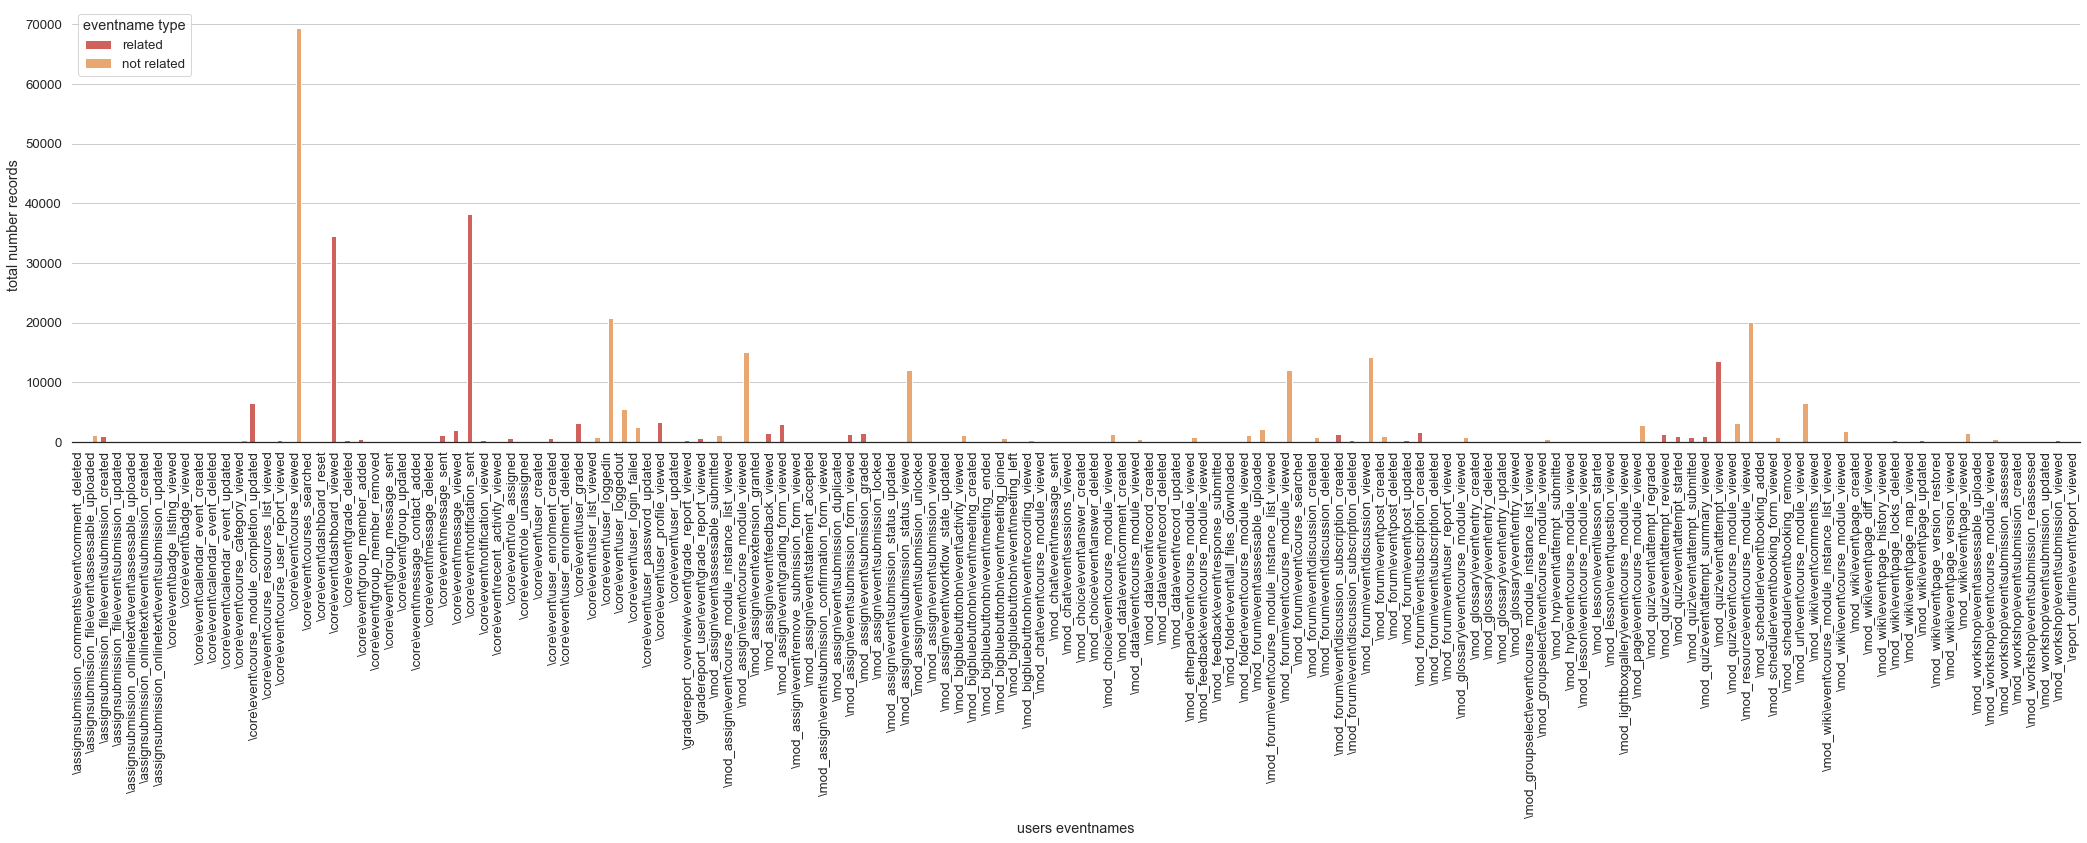

In [24]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(36, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Entfernung der ersten Zeile betreffend die eventnames ohne Werte,
# um Differenzen anderer Werte besser visualisieren zu können.
# users_eventnames = users_eventnames[1:]

# Visualisierung der Menge der Log-Einträge pro Eventname mit und ohne Personenbezug
result = users_eventnames.stack().reset_index().set_index('eventname').rename(columns={'level_1': 'related', 0: 'not related'})
chart = sns.barplot(x=result.index, y='not related', data=result, hue='related')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('users eventnames')
chart.set_ylabel('total number records')
# chart.yaxis.set_ticks(range(0, 5500, 500))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper left', title='eventname type')
# plt.savefig('charts/Menge_der_Log-Eintraege_pro_Aktivitaet_und_Benutzergruppe.pdf', format='pdf')
plt.show()